In [54]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [55]:
def get_data():
  df = pd.read_csv('ecommerce_data.csv')
  data = df.values

  np.random.shuffle(data)
  X = data[:,:-1]
  Y = data[:,-1].astype(np.int32)
  N, D = X.shape
  X2 = np.zeros((N, D+3))
  X2[:,0:(D-1)] = X[:,0:(D-1)] 
  for n in range(N):
      t = int(X[n,D-1])
      X2[n,t+D-1] = 1
  X = X2

  Xtrain = X[:-100]
  Ytrain = Y[:-100]
  Xtest = X[-100:]
  Ytest = Y[-100:]

  for i in (1, 2):
    m = Xtrain[:,i].mean()
    s = Xtrain[:,i].std()
    Xtrain[:,i] = (Xtrain[:,i] - m) / s
    Xtest[:,i] = (Xtest[:,i] - m) / s

  return Xtrain, Ytrain, Xtest, Ytest


In [56]:
def get_binary_data():
    
  Xtrain, Ytrain, Xtest, Ytest = get_data()
  X2train = Xtrain[Ytrain <= 1]
  Y2train = Ytrain[Ytrain <= 1]
  X2test = Xtest[Ytest <= 1]
  Y2test = Ytest[Ytest <= 1]
  return X2train, Y2train, X2test, Y2test

In [57]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return sigmoid(X.dot(W) + b)


def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY) + (1 - T)*np.log(1 - pY))

In [58]:
Xtrain, Ytrain, Xtest, Ytest = get_binary_data()


D = Xtrain.shape[1]
W = np.random.randn(D)
b = 0

In [59]:
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)

    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W -= learning_rate*(Xtrain.T.dot(pYtrain - Ytrain)-0.1*W)
    b -= learning_rate*((pYtrain - Ytrain).sum()-0.1*b)
    if i % 1000 == 0:
        print(i, ctrain, ctest)

print("Final train classification_rate:", classification_rate(Ytrain, np.round(pYtrain)))
print("Final test classification_rate:", classification_rate(Ytest, np.round(pYtest)))


0 1.5474862388323884 1.4606114223199236
1000 0.20987671256848817 0.0752063829751973
2000 0.20956558266862105 0.07013138823942486
3000 0.2098023373679441 0.06888906410950742
4000 0.20989968256835145 0.06852033004542467
5000 0.20993283186959266 0.06840487483823766
6000 0.20994365772251775 0.06836811484037901
7000 0.20994715082949325 0.06835634824440848
8000 0.20994827371723523 0.06835257541831784
9000 0.2099486342500428 0.06835136504266809
Final train classification_rate: 0.9660493827160493
Final test classification_rate: 0.9864864864864865


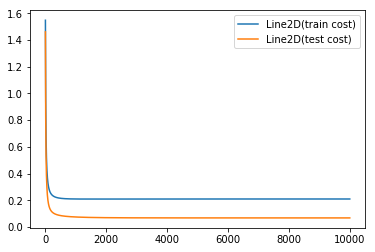

In [60]:
legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()
